# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:
df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 52 columns):
AGREEMENT_RK                  15223 non-null int64
TARGET                        15223 non-null int64
AGE                           15223 non-null int64
SOCSTATUS_WORK_FL             15223 non-null int64
SOCSTATUS_PENS_FL             15223 non-null int64
GENDER                        15223 non-null int64
CHILD_TOTAL                   15223 non-null int64
DEPENDANTS                    15223 non-null int64
EDUCATION                     15223 non-null object
MARITAL_STATUS                15223 non-null object
GEN_INDUSTRY                  13856 non-null object
GEN_TITLE                     13856 non-null object
ORG_TP_STATE                  13856 non-null object
ORG_TP_FCAPITAL               13858 non-null object
JOB_DIR                       13856 non-null object
FAMILY_INCOME                 15223 non-null object
PERSONAL_INCOME               15223 non-null object
REG_ADDRESS_PRO

In [6]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14910 entries, 0 to 14909
Data columns (total 52 columns):
AGREEMENT_RK                  14910 non-null int64
TARGET                        14910 non-null int64
AGE                           14910 non-null int64
SOCSTATUS_WORK_FL             14910 non-null int64
SOCSTATUS_PENS_FL             14910 non-null int64
GENDER                        14910 non-null int64
CHILD_TOTAL                   14910 non-null int64
DEPENDANTS                    14910 non-null int64
EDUCATION                     14910 non-null object
MARITAL_STATUS                14910 non-null object
GEN_INDUSTRY                  13564 non-null object
GEN_TITLE                     13564 non-null object
ORG_TP_STATE                  13564 non-null object
ORG_TP_FCAPITAL               13567 non-null object
JOB_DIR                       13564 non-null object
FAMILY_INCOME                 14910 non-null object
PERSONAL_INCOME               14910 non-null object
REG_ADDRESS_PRO

In [8]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [9]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'
df = df_test.append(df_train).reset_index(drop=True)
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [11]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Неоконченное высшее', 'Два и более высших образования', 'Высшее', 'Среднее специальное', 'Неполное среднее', 'Среднее', 'Ученая степень'}


MARITAL_STATUS
{'Гражданский брак', 'Не состоял в браке', 'Состою в браке', 'Разведен(а)', 'Вдовец/Вдова'}


GEN_INDUSTRY
{'Государственная служба', nan, 'Коммунальное хоз-во/Дорожные службы', 'Транспорт', 'ЧОП/Детективная д-ть', 'Страхование', 'Маркетинг', 'Торговля', 'Строительство', 'Подбор персонала', 'Логистика', 'Ресторанный бизнес/Общественное питание', 'Салоны красоты и здоровья', 'Химия/Парфюмерия/Фармацевтика', 'Образование', 'Сельское хозяйство', 'Юридические услуги/нотариальные услуги', 'Металлургия/Промышленность/Машиностроение', 'Туризм', 'Управляющая компания', 'Энергетика', 'Нефтегазовая промышленность', 'Здравоохранение', 'Банк/Финансы', 'СМИ/Реклама/PR-агенства', 'Сборочные производства', 'Недвижимость', 'Наука', 'Информационные технологии', 'Развлечения/Искусство', 'Информационные услуги', 'Другие сферы'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

# Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

> df_output['REGION_NM'] = df_output['REGION_NM'].fillna('REGION_Noname')

> В столбце WORK_TIME были выбросы, введем ограничение:

> WORK_TIME_mean = df[df['WORK_TIME']<1000]['WORK_TIME'].median(skipna=True)

> df_output['WORK_TIME'].map(lambda x: x if x<1000 else WORK_TIME_median )

> Остальные столбцы удалим в дальнейшем, к которых будут Nan значения.


## Задание 2. Есть ли категориальные признаки? Что с ними делать?

> Категориальные признаки разнести на столбцы и проставить в соответствии 0 или 1.

> Оставшиеся категориальные признаки ниже. На выходе будет датафрейм с числами.

> Оставим только "+" фичи:
> '+ EDUCATION',
> '+ MARITAL_STATUS',
> 'GEN_INDUSTRY',
> 'GEN_TITLE',
> 'ORG_TP_STATE',
> 'ORG_TP_FCAPITAL',
> 'JOB_DIR',
> '+ FAMILY_INCOME',
> 'REG_ADDRESS_PROVINCE',
> 'FACT_ADDRESS_PROVINCE',
> 'POSTAL_ADDRESS_PROVINCE',
> 'TP_PROVINCE',
> '+REGION_NM',
> '+sample'

> Остальные фичи удаляем, при такой маленькой выборке делаю предположение, что "погоды" не сделают.

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [12]:
def preproc_data(df_input):
    df_output = df_input.copy()
    
    df_output = df_output.drop('AGREEMENT_RK', axis = 1)
    
    df_output['PERSONAL_INCOME'] = df_output['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['CREDIT'] = df_output['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['FST_PAYMENT'] = df_output['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_AVG_DLQ_AMT'] = df_output['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_MAX_DLQ_AMT'] = df_output['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')    
    
    df_output = df_output.drop(['FACT_PHONE_FL', 'REG_PHONE_FL', 'GEN_PHONE_FL','GEN_INDUSTRY',
                    'GEN_TITLE','ORG_TP_STATE','ORG_TP_FCAPITAL','JOB_DIR','REG_ADDRESS_PROVINCE',
                    'FACT_ADDRESS_PROVINCE','POSTAL_ADDRESS_PROVINCE','TP_PROVINCE','DL_DOCUMENT_FL'], axis = 1)
    
    df_output['REGION_NM'] = df_output['REGION_NM'].fillna('REGION_Noname')
    
    WORK_TIME_median = df[df['WORK_TIME']<1000]['WORK_TIME'].median(skipna=True)
    df_output['WORK_TIME'] = df_output['WORK_TIME'].map(lambda x: x if x<1000 else WORK_TIME_median )
    
    #в описании указано что 'количество уже утилизированных карт ( если пусто = 0) '
    df_output['PREVIOUS_CARD_NUM_UTILIZED'] = df_output['PREVIOUS_CARD_NUM_UTILIZED'].fillna(0)
    
    object_columns = ['EDUCATION', 'MARITAL_STATUS', 'FAMILY_INCOME', 'REGION_NM']
    df_output = pd.get_dummies(df_output, columns=object_columns)
    
    ## Your Code Here
    
    return df_output

df = preproc_data(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 64 columns):
TARGET                                      30133 non-null int64
AGE                                         30133 non-null int64
SOCSTATUS_WORK_FL                           30133 non-null int64
SOCSTATUS_PENS_FL                           30133 non-null int64
GENDER                                      30133 non-null int64
CHILD_TOTAL                                 30133 non-null int64
DEPENDANTS                                  30133 non-null int64
PERSONAL_INCOME                             30133 non-null float64
REG_FACT_FL                                 30133 non-null int64
FACT_POST_FL                                30133 non-null int64
REG_POST_FL                                 30133 non-null int64
REG_FACT_POST_FL                            30133 non-null int64
REG_FACT_POST_TP_FL                         30133 non-null int64
FL_PRESENCE_FL                              

In [13]:
# # посмотрим какие еще категориальные признаки остались

# object_columns = []
# for i in df.columns: # перебираем все столбцы
#     if str(df[i].dtype) == 'object': # если тип столбца - object
#         print('='*10)
#         print(i) # выводим название столбца
#         print(set(df[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
#         print(list(df[i].value_counts()))
#         print('\n') # выводим пустую строку
#         if i in 'sample':
#             True
#         else:
#             object_columns.append(i)

# в этих данных большая часть Nan значений, удалим эти признаки

# df = df.drop(object_columns, axis = 1)


In [14]:
df_preproc = df.dropna()

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

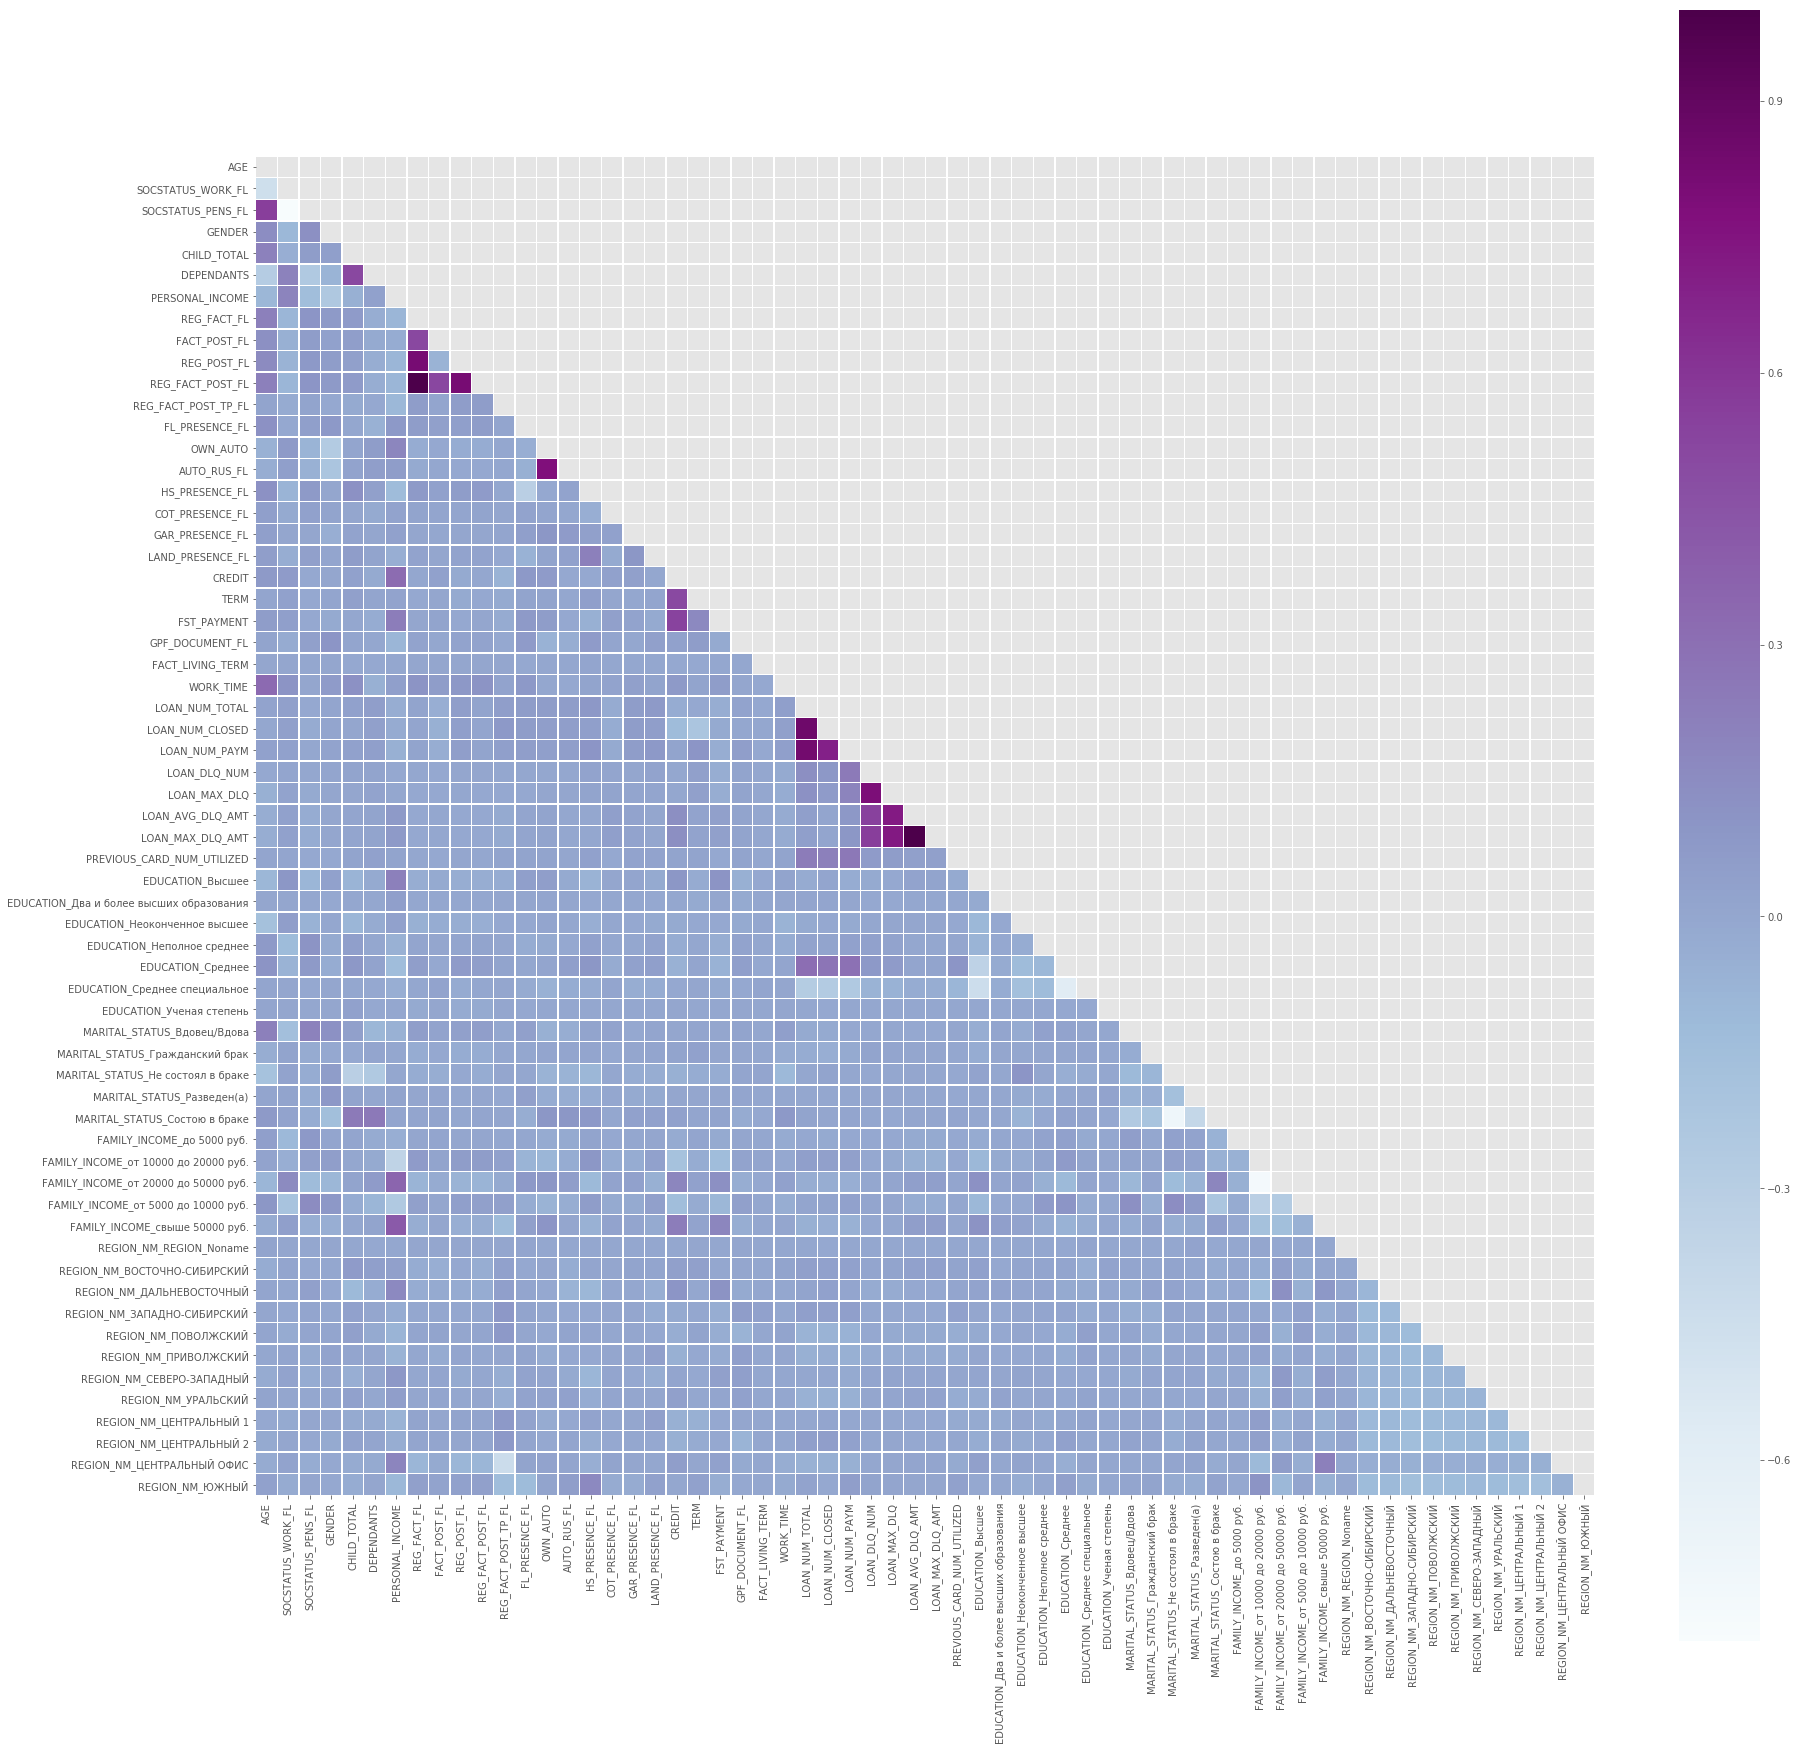

In [15]:
import numpy as np

#Посмотрим на получившуюся выборку

# Compute the correlation matrix 
# exclude 'Open' variable
corr_all = df_train_preproc.drop('TARGET', axis = 1).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_all, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (30, 30))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_all, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu")      
plt.show()

In [16]:
df_y_train = list(df_train_preproc['TARGET'])
df_x_train = df_train_preproc.drop(['TARGET'], axis = 1)
df_y_test = list(df_test_preproc['TARGET'])
df_x_test = df_test_preproc.drop(['TARGET'], axis = 1)
print('train ', df_x_train.shape)
print('test ',df_x_test.shape)

train  (15223, 62)
test  (14910, 62)


#### Задание 5. Обучение и оценка качества разных моделей

In [17]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba


from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression  # импортируем модель машинного обучения
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

X_train, X_test, y_train, y = train_test_split(df_x_train, df_y_train, test_size=0.33, random_state=42)
print('X_train ', X_train.shape)
print('X_test ',X_test.shape)


X_train  (10199, 62)
X_test  (5024, 62)


C:\Users\drsadykov\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [18]:
dict_model = {}
# Повторяем код обучения и предсказывания, но обучаем на одном куске, а предсказываем на другом

model1 = LogisticRegression()                     # инициализируем модель
model1.fit(X_train, y_train)                      # обучаем модель
predict = model1.predict(X_test)                      # делаем предсказание
dict_model ['LogisticRegression']= [precision_score(y, predict), recall_score(y, predict), accuracy_score(y, predict)]
print('#'*10,'>>> LogisticRegression <<<','#'*10,'\n',classification_report(y, predict),'\n')


from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier() 
model2.fit(X_train, y_train) 
predict = model2.predict(X_test) 
dict_model['DecisionTreeClassifier'] = [precision_score(y, predict), recall_score(y, predict), accuracy_score(y, predict)]
print('#'*10,'>>> DecisionTreeClassifier <<<','#'*10,'\n',classification_report(y, predict),'\n')


from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier()
model3.fit(X_train, y_train)  
predict = model3.predict(X_test)
dict_model ['RandomForestClassifier']= [precision_score(y, predict), recall_score(y, predict), accuracy_score(y, predict)]
print('#'*10,'>>> RandomForestClassifier <<<','#'*10,'\n',classification_report(y, predict),'\n')

########## >>> LogisticRegression <<< ########## 
              precision    recall  f1-score   support

          0       0.88      1.00      0.94      4414
          1       0.40      0.00      0.01       610

avg / total       0.82      0.88      0.82      5024
 

########## >>> DecisionTreeClassifier <<< ########## 
              precision    recall  f1-score   support

          0       0.89      0.87      0.88      4414
          1       0.17      0.20      0.19       610

avg / total       0.80      0.79      0.79      5024
 

########## >>> RandomForestClassifier <<< ########## 
              precision    recall  f1-score   support

          0       0.88      1.00      0.93      4414
          1       0.26      0.01      0.02       610

avg / total       0.80      0.88      0.82      5024
 



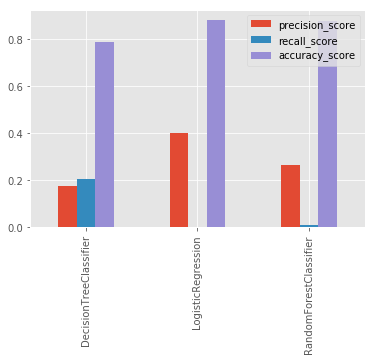

In [19]:
# Посчитать метрики стандартные
# accuracy, precision, recall

df_model = pd.DataFrame(dict_model).T
df_model.columns = ['precision_score','recall_score','accuracy_score']

# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает
plt.figure(figsize=(15, 15))
df_model.plot(kind='bar', legend=True)

C:\Users\drsadykov\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


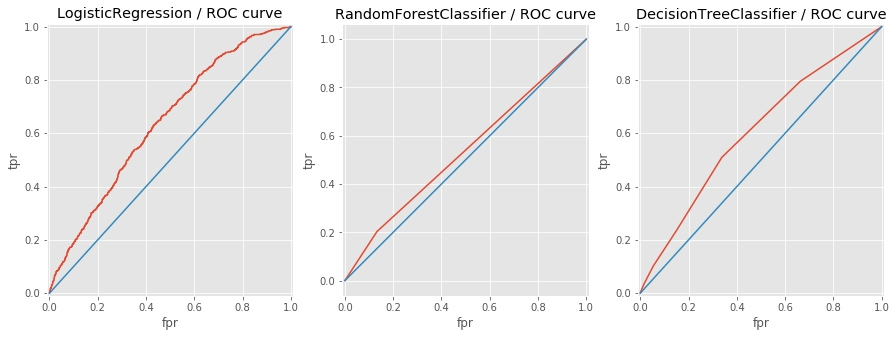

In [20]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
# Подпишите оси и линии

plt.figure(figsize=(15, 5))

#subplot 1
plt.subplot(131)
predict_proba1 = model1.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y, predict_proba1[:,1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('LogisticRegression / ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
#subplot 2
plt.subplot(132)
predict_proba2 = model2.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y, predict_proba2[:,1])
plt.plot(fpr, tpr);
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.axis('equal')
plt.grid(True)
plt.title('RandomForestClassifier / ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
#subplot 3
plt.subplot(133)
predict_proba3 = model3.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y, predict_proba3[:,1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('DecisionTreeClassifier / ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.show()

In [21]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

cross1 = cross_val_score(model1,df_x_train,df_y_train,scoring='roc_auc', cv=10)
cross2 = cross_val_score(model2,df_x_train,df_y_train,scoring='roc_auc', cv=10)
cross3 = cross_val_score(model3,df_x_train,df_y_train,scoring='roc_auc', cv=10)
print('#'*10,'>>> AVG roc_auc for Train: <<<','#'*10,'\nModel 1. LogisticRegression\t{:.2f}\nModel 2. RandomForestClassifier\t{:.2f}\nModel 3. DecisionTreeClassifier\t{:.2f} '
      .format( (sum(cross1) / float(len(cross1))),(sum(cross2) / float(len(cross2))),(sum(cross3) / float(len(cross3))) ) )

########## >>> AVG roc_auc for Train: <<< ########## 
Model 1. LogisticRegression	0.63
Model 2. RandomForestClassifier	0.53
Model 3. DecisionTreeClassifier	0.59 


########## >>> LogisticRegression for Test <<< ########## 
              precision    recall  f1-score   support

          0       0.88      1.00      0.94     13160
          1       0.11      0.00      0.00      1750

avg / total       0.79      0.88      0.83     14910
 

########## >>> AVG roc_auc for Train: <<< ########## 
Model 1. LogisticRegression	0.63



C:\Users\drsadykov\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


(-0.01, 1.01)

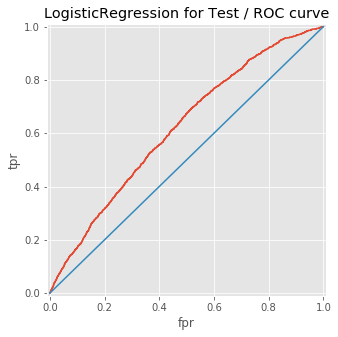

In [22]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки
predict = model1.predict(df_x_test)

# Померить roc_auc на тесте
# Вывести текстом и на графике =)
print('#'*10,'>>> LogisticRegression for Test <<<','#'*10,'\n',classification_report(df_y_test, predict),'\n')

cross1 = cross_val_score(model1,df_x_train,df_y_train,scoring='roc_auc', cv=10)
print('#'*10,'>>> AVG roc_auc for Train: <<<','#'*10,'\nModel 1. LogisticRegression\t{:.2f}\n'.format( (sum(cross1) / float(len(cross1))) ) )


plt.figure(figsize=(5, 5))
predict_proba1 = model1.predict_proba(df_x_test)
fpr, tpr, thresholds = roc_curve(df_y_test, predict_proba1[:,1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('LogisticRegression for Test / ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

> Для дополнительного примера рассмотрен вариант без df = df.dropna() - т.е. в выборке оставил около 2тыс. строк

In [23]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'
df_new = df_test.append(df_train).reset_index(drop=True)
df_new = df_new.drop(['FACT_PHONE_FL', 'REG_PHONE_FL', 'GEN_PHONE_FL','GEN_INDUSTRY',
                    'ORG_TP_FCAPITAL','REG_ADDRESS_PROVINCE','FACT_ADDRESS_PROVINCE',
                    'POSTAL_ADDRESS_PROVINCE','TP_PROVINCE','DL_DOCUMENT_FL',
                   'REG_ADDRESS_PROVINCE','FACT_ADDRESS_PROVINCE','POSTAL_ADDRESS_PROVINCE',
                   'TP_PROVINCE'], axis = 1)

In [24]:
def preproc_data_new(df_input):
    df_output = df_input.copy()
    
    df_output = df_output.drop('AGREEMENT_RK', axis = 1)
    
    df_output['PERSONAL_INCOME'] = df_output['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['CREDIT'] = df_output['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['FST_PAYMENT'] = df_output['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_AVG_DLQ_AMT'] = df_output['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_MAX_DLQ_AMT'] = df_output['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')    
    
    df_output['REGION_NM'] = df_output['REGION_NM'].fillna('Noname')
    
    WORK_TIME_median = df[df['WORK_TIME']<1000]['WORK_TIME'].median(skipna=True)
    df_output['WORK_TIME'] = df_output['WORK_TIME'].map(lambda x: x if x<1000 else WORK_TIME_median )
    
    #в описании указано что 'количество уже утилизированных карт ( если пусто = 0) '
    df_output['PREVIOUS_CARD_NUM_UTILIZED'] = df_output['PREVIOUS_CARD_NUM_UTILIZED'].fillna(0)
    
    return df_output

df_new = preproc_data_new(df_new)

In [25]:
# посмотрим людей с пустыми полями: 'GEN_TITLE','ORG_TP_STATE','JOB_DIR'
df_new[df_new['GEN_TITLE'].isnull()][['GEN_TITLE','ORG_TP_STATE','JOB_DIR']].head()

,GEN_TITLE,ORG_TP_STATE,JOB_DIR
1,NaN,NaN,NaN
5,NaN,NaN,NaN
8,NaN,NaN,NaN
12,NaN,NaN,NaN
20,NaN,NaN,NaN


In [26]:
#удалим этих людей
# df_new = df_new.dropna()

#заменим их на Noname
df_new['GEN_TITLE'] = df_new['GEN_TITLE'].fillna('Noname')
df_new['ORG_TP_STATE'] = df_new['ORG_TP_STATE'] .fillna('Noname')
df_new['JOB_DIR'] = df_new['JOB_DIR'].fillna('Noname')
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 42 columns):
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_TITLE                     30133 non-null object
ORG_TP_STATE                  30133 non-null object
JOB_DIR                       30133 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null float64
REGION_NM                     30133 non-null object
REG_FACT_FL                   30133 non-null int64
FACT_POST_FL                  30133 non-null int64
REG_POST_FL    

In [27]:
for i in df_new.columns: # перебираем все столбцы
    if i in ['GEN_TITLE','ORG_TP_STATE','JOB_DIR']: # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_new[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

GEN_TITLE
{'Индивидуальный предприниматель', 'Рабочий', 'Noname', 'Руководитель низшего звена', 'Служащий', 'Работник сферы услуг', 'Другое', 'Военнослужащий по контракту', 'Высококвалифиц. специалист', 'Партнер', 'Руководитель среднего звена', 'Руководитель высшего звена', 'Специалист'}


ORG_TP_STATE
{'Индивидуальный предприниматель', 'Частная компания', 'Noname', 'Частная ком. с инос. капиталом', 'Некоммерческая организация', 'Государственная комп./учреж.'}


JOB_DIR
{'Юридическая служба', 'Noname', 'Участие в основ. деятельности', 'Служба безопасности', 'Снабжение и сбыт', 'Кадровая служба и секретариат', 'Бухгалтерия, финансы, планир.', 'Реклама и маркетинг', 'Пр-техн. обесп. и телеком.', 'Адм-хоз. и трансп. службы', 'Вспомогательный техперсонал'}




In [28]:
object_columns = ['EDUCATION', 'MARITAL_STATUS','GEN_TITLE','ORG_TP_STATE','JOB_DIR', 'FAMILY_INCOME', 'REGION_NM']
df_new = pd.get_dummies(df_new, columns=object_columns)
df_new.shape

(30133, 94)

In [29]:
df_preproc = df_new

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

df_y_train = list(df_train_preproc['TARGET'])
df_x_train = df_train_preproc.drop(['TARGET'], axis = 1)
df_y_test = list(df_test_preproc['TARGET'])
df_x_test = df_test_preproc.drop(['TARGET'], axis = 1)
print('train ', df_x_train.shape)
print('test ',df_x_test.shape)

X_train, X_test, y_train, y = train_test_split(df_x_train, df_y_train, test_size=0.33, random_state=42)
print('X_train ', X_train.shape)
print('X_test ',X_test.shape)

train  (15223, 92)
test  (14910, 92)
X_train  (10199, 92)
X_test  (5024, 92)


########## >>> LogisticRegression <<< ########## 
              precision    recall  f1-score   support

          0       0.88      1.00      0.94      4414
          1       0.43      0.00      0.01       610

avg / total       0.82      0.88      0.82      5024
 

########## >>> DecisionTreeClassifier <<< ########## 
              precision    recall  f1-score   support

          0       0.89      0.88      0.88      4414
          1       0.18      0.18      0.18       610

avg / total       0.80      0.80      0.80      5024
 

########## >>> RandomForestClassifier <<< ########## 
              precision    recall  f1-score   support

          0       0.88      1.00      0.93      4414
          1       0.31      0.01      0.03       610

avg / total       0.81      0.88      0.82      5024
 



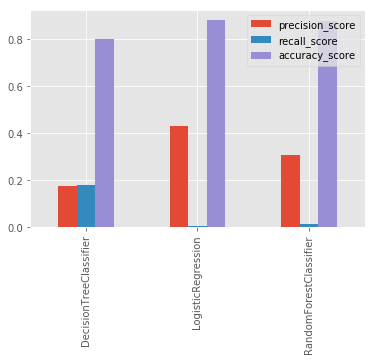

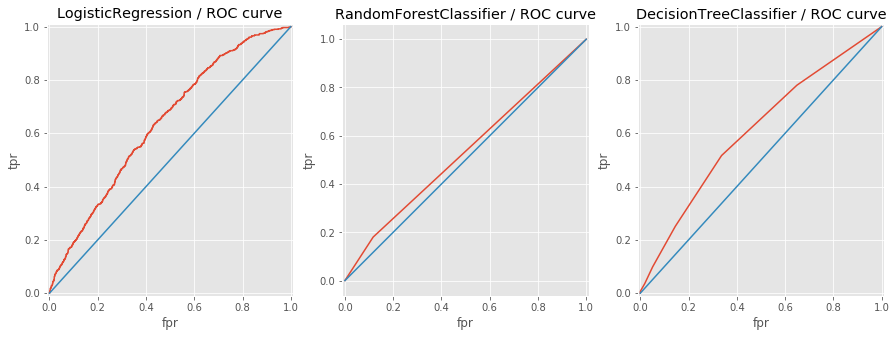

In [30]:
dict_model = {}
# Повторяем код обучения и предсказывания, но обучаем на одном куске, а предсказываем на другом

model1 = LogisticRegression()                     # инициализируем модель
model1.fit(X_train, y_train)                      # обучаем модель
predict = model1.predict(X_test)                      # делаем предсказание
dict_model ['LogisticRegression']= [precision_score(y, predict), recall_score(y, predict), accuracy_score(y, predict)]
print('#'*10,'>>> LogisticRegression <<<','#'*10,'\n',classification_report(y, predict),'\n')


from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier() 
model2.fit(X_train, y_train) 
predict = model2.predict(X_test) 
dict_model['DecisionTreeClassifier'] = [precision_score(y, predict), recall_score(y, predict), accuracy_score(y, predict)]
print('#'*10,'>>> DecisionTreeClassifier <<<','#'*10,'\n',classification_report(y, predict),'\n')


from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier()
model3.fit(X_train, y_train)  
predict = model3.predict(X_test)
dict_model ['RandomForestClassifier']= [precision_score(y, predict), recall_score(y, predict), accuracy_score(y, predict)]
print('#'*10,'>>> RandomForestClassifier <<<','#'*10,'\n',classification_report(y, predict),'\n')

# Посчитать метрики стандартные
# accuracy, precision, recall

df_model = pd.DataFrame(dict_model).T
df_model.columns = ['precision_score','recall_score','accuracy_score']

# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает
plt.figure(figsize=(15, 15))
df_model.plot(kind='bar', legend=True)

# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
# Подпишите оси и линии

plt.figure(figsize=(15, 5))

#subplot 1
plt.subplot(131)
predict_proba1 = model1.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y, predict_proba1[:,1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('LogisticRegression / ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
#subplot 2
plt.subplot(132)
predict_proba2 = model2.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y, predict_proba2[:,1])
plt.plot(fpr, tpr);
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.axis('equal')
plt.grid(True)
plt.title('RandomForestClassifier / ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
#subplot 3
plt.subplot(133)
predict_proba3 = model3.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y, predict_proba3[:,1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('DecisionTreeClassifier / ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.show()


########## >>> AVG roc_auc for Train: <<< ########## 
Model 1. LogisticRegression	0.64
Model 2. RandomForestClassifier	0.53
Model 3. DecisionTreeClassifier	0.60 
########## >>> LogisticRegression for Test <<< ########## 
              precision    recall  f1-score   support

          0       0.88      1.00      0.94     13160
          1       0.10      0.00      0.00      1750

avg / total       0.79      0.88      0.83     14910
 


########## >>> AVG roc_auc for Train: <<< ########## 
Model 1. LogisticRegression	0.64



(-0.01, 1.01)

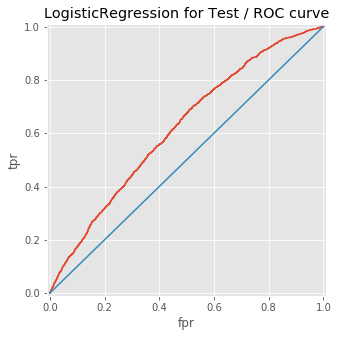

In [31]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

cross1 = cross_val_score(model1,df_x_train,df_y_train,scoring='roc_auc', cv=10)
cross2 = cross_val_score(model2,df_x_train,df_y_train,scoring='roc_auc', cv=10)
cross3 = cross_val_score(model3,df_x_train,df_y_train,scoring='roc_auc', cv=10)
print('#'*10,'>>> AVG roc_auc for Train: <<<','#'*10,'\nModel 1. LogisticRegression\t{:.2f}\nModel 2. RandomForestClassifier\t{:.2f}\nModel 3. DecisionTreeClassifier\t{:.2f} '.format( (sum(cross1) / float(len(cross1))),(sum(cross2) / float(len(cross2))),(sum(cross3) / float(len(cross3))) ) )

# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки
predict = model1.predict(df_x_test)

# Померить roc_auc на тесте
# Вывести текстом и на графике =)
print('#'*10,'>>> LogisticRegression for Test <<<','#'*10,'\n',classification_report(df_y_test, predict),'\n\n')

cross1 = cross_val_score(model1,df_x_train,df_y_train,scoring='roc_auc', cv=10)
print('#'*10,'>>> AVG roc_auc for Train: <<<','#'*10,'\nModel 1. LogisticRegression\t{:.2f}\n'.format( (sum(cross1) / float(len(cross1))) ) )


plt.figure(figsize=(5, 5))
predict_proba1 = model1.predict_proba(df_x_test)
fpr, tpr, thresholds = roc_curve(df_y_test, predict_proba1[:,1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('LogisticRegression for Test / ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
